In [362]:
from IPython.display import Image
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
</form>''')

# Notes from Stanford DB5: SQL

Lecture notes from the online [mini-course on SQL](https://lagunita.stanford.edu/courses/DB/SQL/SelfPaced/about) from the   [Stanford Online self paced Databases course](https://lagunita.stanford.edu/courses/DB/2014/SelfPaced/about).

<h2 id="tocheading">Table of Contents</h2>
<div id="toc"></div>

In [366]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

## Preparation steps, to be able to follow lectures

1. Import sqlite3 library to create a local sqlite database and populate it with the sql-scripts given in the lectures, by reading the files and executing them line for line with sqlite3.
2. Load ipython-sql, do be able to do some interactive %sql and %%sql magic, which returns the queries to a nicely formatted data frame, and connect it to the database created.

In [179]:
import sqlite3
db = sqlite3.connect('college.db') 
c = db.cursor()
schema = open('CollegeSchema.sql', 'r')
c.executescript(schema.read())
schema.close()
data = open('CollegeData.sql', 'r')
c.executescript(data.read())
data.close()

In [180]:
%load_ext sql
%sql sqlite:///college.db
%matplotlib inline

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [181]:
# Now we can easily run sql queries on the databased with a simple %sql in front.
%sql select cName from College

Done.


cName
Stanford
Berkeley
MIT
Cornell


Syntax highlighting is not entirely correct though. It should be like this (it works correctly sometimes, sometimes not):

```sql
select * from College;
insert into College values ('Columbia', 'NY', 20000)
```

# Introduction to SQL

- S.Q.L. or "sequel" - usually pronounced sequel.
- Supperted by all major commercial database systems.
- Standardized - many new features over time.
- Interactive via GUI or prompt, or embedded in programs.
- Declarative, based on relational algebra.
    - Use a query optimizer: you only need to describe *what* you want, and the query optimizer figures out *how* to get that data most efficiently. The query optimizer is extremely important.
- SQL is also compositional - a query returns a relation.
    
## Data Definition Language (DDL)

- create table ...
- crop table ...

and so on..

## Data Manipulation Language (DML)

- select
- insert
- delete
- update

and so on..

# The Basic SELECT Statement

Is equivalent to the relational algebra query given below.

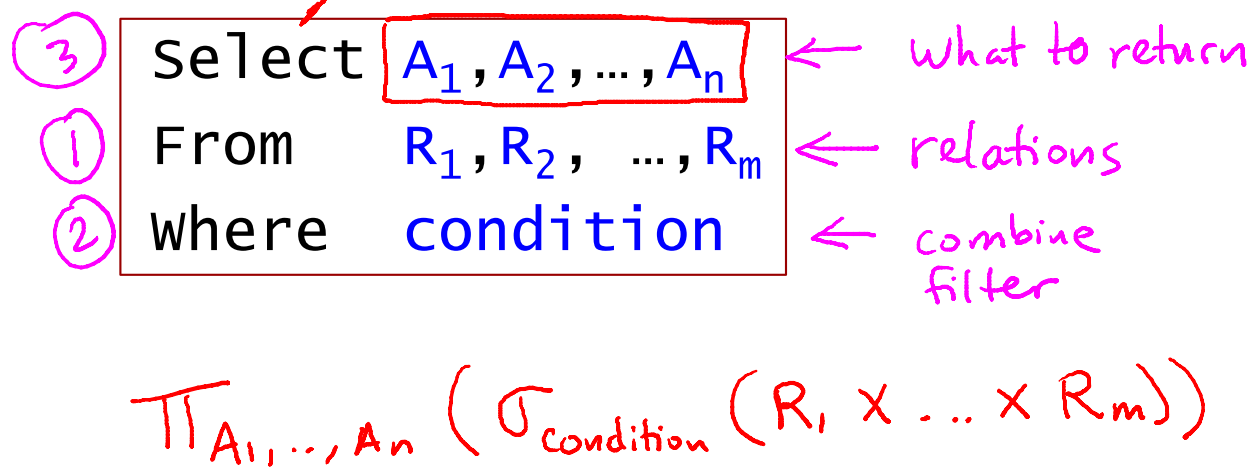

In [182]:
Image(filename="files/select.png")

The demo to work with: a simple college admissions database

- College(**cName**, state, enrollment)
- Student(**sID**, sName, GPA, sizeHS)
- Apply(**sID, cName, major**, decision)

**Keys** are in bold. (Keys are usually, in literature, signified by underlines, but this feat is not availible in markdown, so I'll use bold instead.)

## View demo data

To make it easier to work with. (I, at least, think much clearer when I see things visually).

In [183]:
%sql select * from College;

Done.


cName,state,enrollment
Stanford,CA,15000
Berkeley,CA,36000
MIT,MA,10000
Cornell,NY,21000


In [184]:
%sql select * from Student;

Done.


sID,sName,GPA,sizeHS
123,Amy,3.9,1000
234,Bob,3.6,1500
345,Craig,3.5,500
456,Doris,3.9,1000
567,Edward,2.9,2000
678,Fay,3.8,200
789,Gary,3.4,800
987,Helen,3.7,800
876,Irene,3.9,400
765,Jay,2.9,1500


In [185]:
%sql select * from Apply;

Done.


sID,cName,major,decision
123,Stanford,CS,Y
123,Stanford,EE,N
123,Berkeley,CS,Y
123,Cornell,EE,Y
234,Berkeley,biology,N
345,MIT,bioengineering,Y
345,Cornell,bioengineering,N
345,Cornell,CS,Y
345,Cornell,EE,N
678,Stanford,history,Y


## SELECT query 1

Finds the sID, sName and GPA of students with a GPA > 3.6.

In [186]:
%%sql 
select sID, sName, GPA
from Student
where GPA > 3.6;

Done.


sID,sName,GPA
123,Amy,3.9
456,Doris,3.9
678,Fay,3.8
987,Helen,3.7
876,Irene,3.9
654,Amy,3.9


## SELECT query 2

Will combine two relations. In this query we're going to find the names of the students and the majors for which they have applied.

Note: a natural join in relational algebra has to be explicitely given in SQL, with a `where` condition telling which attributes to join on.

In [187]:
%%sql
select sName, major
from Student, Apply
where Student.sID = Apply.sID;

Done.


sName,major
Amy,CS
Amy,EE
Amy,CS
Amy,EE
Bob,biology
Craig,bioengineering
Craig,bioengineering
Craig,CS
Craig,EE
Fay,history


SQL, as opposed to relational algebra, returns duplicates by default. SQL is based on the multiset model. To remove duplicates, add the keyword `distinct` to the `select` statement.

In [188]:
%%sql
select distinct sName, major
from Student, Apply
where Student.sID = Apply.sID;

Done.


sName,major
Amy,CS
Amy,EE
Bob,biology
Craig,CS
Craig,EE
Craig,bioengineering
Fay,history
Helen,CS
Irene,CS
Irene,biology


## SELECT query 3

Query: sName, GPA and decsion of students whose sizeHS $<$ 100 and has applied to CS on Stanford.

Notice that the case on attributes doesn't matter in a query.

In [189]:
%%sql
select sname, gpa, decision
from Student, Apply
where Student.sID = Apply.sID 
    and sizeHS < 1000 and major = 'CS' and cName = 'Stanford';

Done.


sName,GPA,decision
Helen,3.7,Y
Irene,3.9,N


## SELECT query 4 (ambigous column call)

An example of error produced, if you have an ambigous attribute (RA) call/column (SQL) name. There is a cName in both relations College and Apply.

In [190]:
%%sql
select cName
from College, Apply
where College.cName = Apply.cName
    and enrollment > 2000 and major = 'CS';

(sqlite3.OperationalError) ambiguous column name: cName [SQL: u"select cName\nfrom College, Apply\nwhere College.cName = Apply.cName\n    and enrollment > 2000 and major = 'CS';"]


To avoid this error, simply state which cName you are interested in. Notice again, that this query will return duplicates (include the `distinct` keyword to remove them).

In [191]:
%%sql
select College.cName
from College, Apply
where College.cName = Apply.cName
    and enrollment > 2000 and major = 'CS';

Done.


cName
Stanford
Stanford
Stanford
Berkeley
Berkeley
MIT
Cornell


## SELECT query 5 (join, sort)

Query: This time we're finally going to join all three of our relations, Student, college and apply. And we're going to apply the joint conditions that ensure that
we're talking about the same student and the same college.
And then from the result
of that big cross-product, that
big join, we're going to
get the student ID, their name,
their GPA, the college that
they're applying to and the enrollment of that college.
So just a whole bunch of
information associated with this student's applications.

In [192]:
%%sql
select Student.sID, sName, GPA, Apply.cName, enrollment
from Student, College, Apply
where Apply.sID = Student.sID and Apply.cName = College.cName;

Done.


sID,sName,GPA,cName,enrollment
123,Amy,3.9,Stanford,15000
123,Amy,3.9,Stanford,15000
123,Amy,3.9,Berkeley,36000
123,Amy,3.9,Cornell,21000
234,Bob,3.6,Berkeley,36000
345,Craig,3.5,MIT,10000
345,Craig,3.5,Cornell,21000
345,Craig,3.5,Cornell,21000
345,Craig,3.5,Cornell,21000
678,Fay,3.8,Stanford,15000


### SQL query ordering

SQL is, at it's heart, an unordered model. We can get the queries in any order (at random). If we care about our order we can include the `order` clause (ascending is default). So, the query above, with descending order on GPA as the primary sort order and enrollment (ascending) as the second (i.e. ties on primary), will look like:

In [193]:
%%sql
select Student.sID, sName, GPA, Apply.cName, enrollment
from Student, College, Apply
where Apply.sID = Student.sID and Apply.cName = College.cName
order by GPA desc, enrollment;

Done.


sID,sName,GPA,cName,enrollment
876,Irene,3.9,MIT,10000
876,Irene,3.9,MIT,10000
123,Amy,3.9,Stanford,15000
123,Amy,3.9,Stanford,15000
876,Irene,3.9,Stanford,15000
123,Amy,3.9,Cornell,21000
123,Amy,3.9,Berkeley,36000
678,Fay,3.8,Stanford,15000
987,Helen,3.7,Stanford,15000
987,Helen,3.7,Berkeley,36000


## SELECT query 6 (like predicate, \*)

### The `like` predicate

`like` is a built-in operator
in SQL that allows us
to do simple string matching on attribute values.

Query: find all students
who were applying for a major that had to do with bio.

Instead of listing all the
biology majors we can
simply pattern match the major
against the special string here
which says, "match any major
where there's some set of characters,
followed by bio, followed by
some set of characters we execute
the query", and we'll find the
students who have applied for various
bio type majors.

In [194]:
%%sql
select sID, major
from Apply
where major like '%bio%'

Done.


sID,major
234,biology
345,bioengineering
345,bioengineering
876,biology
876,marine biology


### The star (\*) construct

If we simply want to get
all attributes, then we can just write `select *`.

In [195]:
%%sql
select *
from Apply
where major like '%bio%'

Done.


sID,cName,major,decision
234,Berkeley,biology,N
345,MIT,bioengineering,Y
345,Cornell,bioengineering,N
876,MIT,biology,Y
876,MIT,marine biology,N


A simple cross product between Student and College can be written like:

```sql
select * from Student, College;
```
(Since the query is so big, I'll skip the output.)

## SELECT query 7 (artihmetic in query)

Query: with a scaled GPA where
we're going to boost the student's
GPA if they're from a big
high school and reduce it if they're from a small one.
Specifically, we'll take their GPA, multiply
it by the size high school divided by a thousand.

Use the `as` feature to change the label of the schema in a query result.

In [196]:
%%sql
select sID, sName, GPA, sizeHS, GPA*(sizeHS/1000.0) as scaledGPA
from Student;

Done.


sID,sName,GPA,sizeHS,scaledGPA
123,Amy,3.9,1000,3.9
234,Bob,3.6,1500,5.4
345,Craig,3.5,500,1.75
456,Doris,3.9,1000,3.9
567,Edward,2.9,2000,5.8
678,Fay,3.8,200,0.76
789,Gary,3.4,800,2.72
987,Helen,3.7,800,2.96
876,Irene,3.9,400,1.56
765,Jay,2.9,1500,4.35


# Table Variables and Set Operators

Table variables are in the FROM clause, and they actually serve two uses:

1. To make queries more readable.
2. Rename relations that are used in the FROM clause, particularly when we have two instances of the same relation. (Same as in relational algebra.)

Set operators:

1. `union` operator
2. `intersect` operator
3. `except` operator (diff/minus operator)

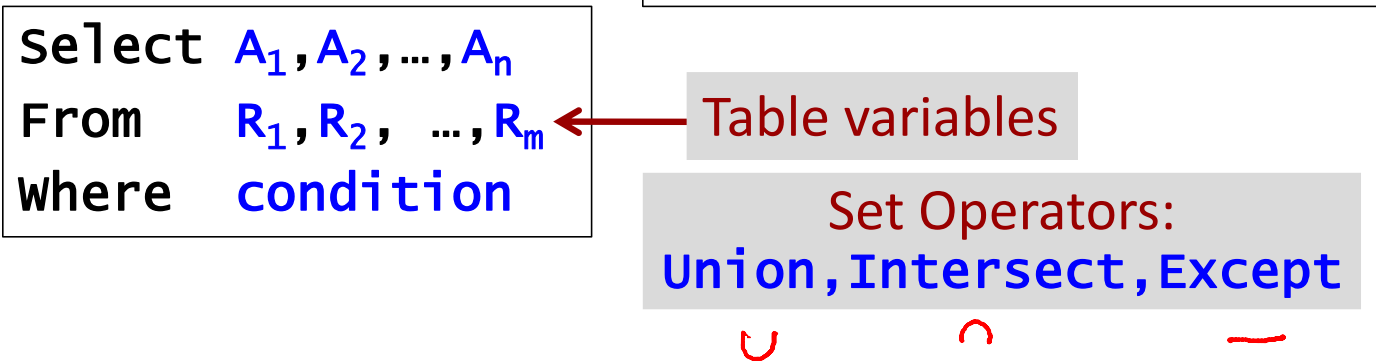

In [197]:
Image(filename="files/vars-operators2.png")

## Table variables

### Application information

In [198]:
%%sql
select Student.sID, sName, GPA, Apply.cName, enrollment
from Student, College, Apply
where Apply.sID = Student.sID and Apply.cName = College.cName;

Done.


sID,sName,GPA,cName,enrollment
123,Amy,3.9,Stanford,15000
123,Amy,3.9,Stanford,15000
123,Amy,3.9,Berkeley,36000
123,Amy,3.9,Cornell,21000
234,Bob,3.6,Berkeley,36000
345,Craig,3.5,MIT,10000
345,Craig,3.5,Cornell,21000
345,Craig,3.5,Cornell,21000
345,Craig,3.5,Cornell,21000
678,Fay,3.8,Stanford,15000


To make it more readable we can add a relation name to all our variables (in `from`), and then change to that name in the rest of the query. It will give the exact same result as above, but the query (sometimes) more readable.

In [199]:
%%sql
select S.sID, S.sName, S.GPA, A.cName, C.enrollment
from Student S, College C, Apply A
where A.sID = S.sID and A.cName = C.cName;

Done.


sID,sName,GPA,cName,enrollment
123,Amy,3.9,Stanford,15000
123,Amy,3.9,Stanford,15000
123,Amy,3.9,Berkeley,36000
123,Amy,3.9,Cornell,21000
234,Bob,3.6,Berkeley,36000
345,Craig,3.5,MIT,10000
345,Craig,3.5,Cornell,21000
345,Craig,3.5,Cornell,21000
345,Craig,3.5,Cornell,21000
678,Fay,3.8,Stanford,15000


### Pairs of students with same GPA (rename, self-join)

Need to add (different) relation names (i.e. rename) to be able to do a "self-join".

Query: every pair of students with the same GPA.

In [200]:
%%sql
select S1.sID, S1.sName, S1.GPA, S2.sID, S2.sName, S2.GPA
from Student S1, Student S2
where S1.GPA = S2.GPA;

Done.


sID,sName,GPA,sID_1,sName_1,GPA_1
123,Amy,3.9,123,Amy,3.9
123,Amy,3.9,456,Doris,3.9
123,Amy,3.9,876,Irene,3.9
123,Amy,3.9,654,Amy,3.9
234,Bob,3.6,234,Bob,3.6
345,Craig,3.5,345,Craig,3.5
456,Doris,3.9,123,Amy,3.9
456,Doris,3.9,456,Doris,3.9
456,Doris,3.9,876,Irene,3.9
456,Doris,3.9,654,Amy,3.9


This might not be exactly what we wanted, as every student is also paired with themselves. To avoid that we will add to where that the sID of the students need to be different.

In [201]:
%%sql
select S1.sID, S1.sName, S1.GPA, S2.sID, S2.sName, S2.GPA
from Student S1, Student S2
where S1.GPA = S2.GPA and S1.sID <> S2.sID;

Done.


sID,sName,GPA,sID_1,sName_1,GPA_1
123,Amy,3.9,456,Doris,3.9
123,Amy,3.9,876,Irene,3.9
123,Amy,3.9,654,Amy,3.9
456,Doris,3.9,123,Amy,3.9
456,Doris,3.9,876,Irene,3.9
456,Doris,3.9,654,Amy,3.9
567,Edward,2.9,765,Jay,2.9
789,Gary,3.4,543,Craig,3.4
876,Irene,3.9,123,Amy,3.9
876,Irene,3.9,456,Doris,3.9


There might still be one other thing we don't want: that pairs occur twice (Amy pairs with Doris and Doris pairs with Amy). To avoid that, we change the not eqal sign in where between the sIDs to a less than.

In [202]:
%%sql
select S1.sID, S1.sName, S1.GPA, S2.sID, S2.sName, S2.GPA
from Student S1, Student S2
where S1.GPA = S2.GPA and S1.sID < S2.sID;

Done.


sID,sName,GPA,sID_1,sName_1,GPA_1
123,Amy,3.9,456,Doris,3.9
123,Amy,3.9,876,Irene,3.9
123,Amy,3.9,654,Amy,3.9
456,Doris,3.9,876,Irene,3.9
456,Doris,3.9,654,Amy,3.9
567,Edward,2.9,765,Jay,2.9
654,Amy,3.9,876,Irene,3.9
543,Craig,3.4,789,Gary,3.4


## Set operators (union, intersect, except)

### List of college names and student names (union)

In [203]:
%%sql
select cName from College
union
select sName from Student;

Done.


cName
Amy
Berkeley
Bob
Cornell
Craig
Doris
Edward
Fay
Gary
Helen


SQL allows a union between two different table names (not possible in relational algebra, you would have to rename first). We can see it chooses cName for the resulting union column.

But a better notation is to rename with the `as` clause in `select`.

In [204]:
%%sql
select cName as name from College
union
select sName as name from Student;

Done.


name
Amy
Berkeley
Bob
Cornell
Craig
Doris
Edward
Fay
Gary
Helen


The resulting column is now called `name`.

Notice also that both queries above returns sorted columns. This is because the `union` operator, by default, eliminates duplicates by sorting the result. BUT, this behavior also depends on the system (e.g. might not behave this way in MySQL).

If we want to keep the duplicates (e.g. for keeping both Amy's in our db), we can add the `all` statement to `union`.

In [205]:
%%sql
select cName as name from College
union all
select sName as name from Student;

Done.


name
Stanford
Berkeley
MIT
Cornell
Amy
Bob
Craig
Doris
Edward
Fay


Notice that it is not sorted any longer, but we also have two Amys and so forth.

To get the above relation sorted, we simply add `order by` clause.

In [206]:
%%sql
select cName as name from College
union all
select sName as name from Student
order by name;

Done.


name
Amy
Amy
Berkeley
Bob
Cornell
Craig
Craig
Doris
Edward
Fay


### IDs of students who applied to both CS and EE (intersect)

PostgreSQL and SQLite supports `intersect` and `except`.

To get the IDs of students who applied to both CS and EE for a major, we can use intersect.

In [207]:
%%sql
select sID from Apply where major = 'CS'
intersect
select sID from Apply where major = 'EE';

Done.


sID
123
345


#### Some systems don't support intersect (e.g. MySQL)

These systems don't loose their expressive power, we just have to write the queries in a different way.

Solution without the use of intersect:

In [208]:
%%sql
select A1.sID
from Apply A1, Apply A2
where A1.sID = A2.sID and A1.major = 'CS' and A2.major = 'EE';

Done.


sID
123
123
123
123
345


Why so many duplicates? Look at Apply table -> we're gonna get all pairs of tuples where one `major` is CS and another EE (one could apply for this combination at several colleges, i.e. many times over).

Add `distinct` to remove duplicates.

In [209]:
%%sql
select distinct A1.sID
from Apply A1, Apply A2
where A1.sID = A2.sID and A1.major = 'CS' and A2.major = 'EE';

Done.


sID
123
345


### IDs of students who applied to CS but not EE (except)

The `except` operator is called difference in relational algebra, and sometimes it is called minus. The SQL standard is `except`.

Query: We find the student IDs who
applied to CS and then
we take away from those the
IDs of students who applied to EE.

In [210]:
%%sql
select sID from Apply where major = 'CS'
except
select sID from Apply where major = 'EE';

Done.


sID
543
876
987


#### Some systems don't support except (e.g. MySQL)

Some database systems don't support
the except operator either and
here, things get a little tricky.
So, let's try to rewrite
that query without using the except operator.

Adding `distinct` to remove duplicates.

In [211]:
%%sql
select distinct A1.sID
from Apply A1, Apply A2
where A1.sID = A2.sID and A1.major = 'CS' and A2.major <> 'EE';

Done.


sID
123
345
543
876
987


HMM - we still get a too many results! Actually, with the constructs learned so far it is not possible to make the same query as with except, but later we will learn more constructs that will allow us to do so.

# Subqueries in WHERE clause

Works for MySQL, Postgres.
SQLite doesn't support All or Any

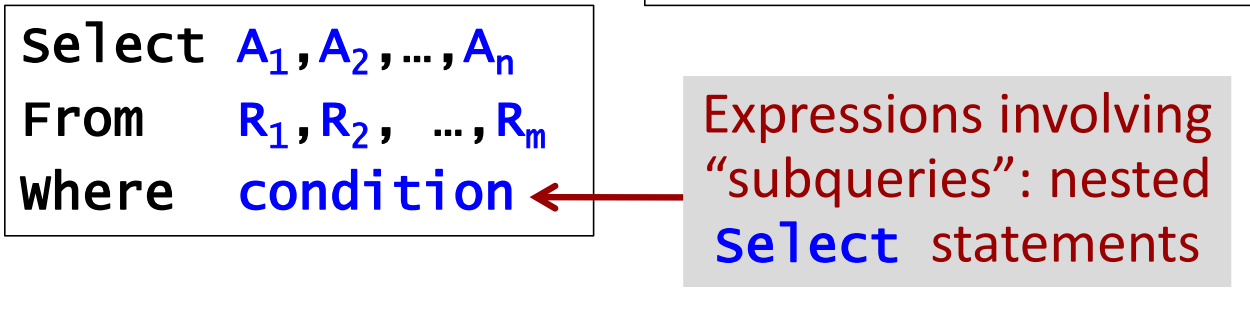

In [212]:
Image(filename="files/subqueries.png")

## IDs and names of students applying to CS

### `in` and `not in`

In [213]:
%%sql
select sID, sName
from Student
where sID in (select sID from Apply where major = 'CS');

Done.


sID,sName
123,Amy
345,Craig
987,Helen
876,Irene
543,Craig


### Same query written without `in`

We don't need to use a subquery in where, we could also join Student and Apply, make sure they're majoring in CS, and get their ID and name.

In [214]:
%%sql
select sID, sName
from Student, Apply
where Student.sID = Apply.sID and major = 'CS';

(sqlite3.OperationalError) ambiguous column name: sID [SQL: u"select sID, sName\nfrom Student, Apply\nwhere Student.sID = Apply.sID and major = 'CS';"]


The error here is due to the `sID` in `select` being ambiguous. To fix it we have to choose either `Student.sID` or `Apply.sID` (doesn't matter which one).

In [215]:
%%sql
select Student.sID, sName
from Student, Apply
where Student.sID = Apply.sID and major = 'CS';

Done.


sID,sName
123,Amy
123,Amy
345,Craig
987,Helen
987,Helen
876,Irene
543,Craig


But now we have several duplicates. The reason for this is that some applied to CS at multiple colleges. To remove them we use `distinct`.

In [216]:
%%sql
select distinct Student.sID, sName
from Student, Apply
where Student.sID = Apply.sID and major = 'CS';

Done.


sID,sName
123,Amy
345,Craig
543,Craig
876,Irene
987,Helen


## Just names of students applying to CS

In [217]:
%%sql
select sName
from Student
where sID in (select sID from Apply where major = 'CS');

Done.


sName
Amy
Craig
Helen
Irene
Craig


(Two different Craigs here)

### Same query written without `in`

In [218]:
%%sql
select sName
from Student, Apply
where Student.sID = Apply.sID and major = 'CS';

Done.


sName
Amy
Amy
Craig
Helen
Helen
Irene
Craig


Duplicates occuring.

BUT, removing duplicates with distinct will give us the **wrong result**, as only one of the two Craigs will appear.

In [219]:
%%sql
select distinct sName
from Student, Apply
where Student.sID = Apply.sID and major = 'CS';

Done.


sName
Amy
Craig
Helen
Irene


## Duplicates are important: average GPA of CS applicants

In [220]:
%%sql
select GPA
from Student
where sID in (select sID from Apply where major = 'CS');

Done.


GPA
3.9
3.5
3.7
3.9
3.4


The duplicates here are "correct".

###  Alternative (incorrect) queries without `in`

In [221]:
%%sql
select GPA
from Student, Apply
where Student.sID = Apply.sID and major = 'CS';

Done.


GPA
3.9
3.9
3.5
3.7
3.7
3.9
3.4


Duplicates occuring

In [222]:
%%sql
select distinct GPA
from Student, Apply
where Student.sID = Apply.sID and major = 'CS';

Done.


GPA
3.4
3.5
3.7
3.9


Again, this approach will remove duplicates we are interested in. The two examples above are good use cases for WHERE subqueries. OR, we could include a column with unique values in the select part of the query (but this will return two columns, which may not be what we want).

## Students who applied to CS but not EE
 
Similary to the query we used `except` for earlier. We can now, with WHERE subqueries, write this query without the `except`.

In [223]:
%%sql
select sID, sName
from Student
where sID in (select sID from Apply where major = 'CS')
  and sID not in (select sID from Apply where major = 'EE');

Done.


sID,sName
987,Helen
876,Irene
543,Craig


(Notice here that the syntax is quite similar to Python's, for e.g. finding a value in/not in a list.)

The below query is equal, but `not` and `sID` has changed place. It's fairly common in SQL for there to be multiple ways to write the same query.

In [224]:
%%sql
select sID, sName
from Student
where sID in (select sID from Apply where major = 'CS')
  and not sID in (select sID from Apply where major = 'EE');

Done.


sID,sName
987,Helen
876,Irene
543,Craig


## All colleges such that some other college is in the same state

### Use the `exists` operator to subqueries

To test whether they're empty or not empty.

Query: find all colleges, such that there's some other college that is in the same state.

In [225]:
%%sql
select cName, state
from College C1
where exists (select * from College C2
              where C2.state = C1.state);

Done.


cName,state
Stanford,CA
Berkeley,CA
MIT,MA
Cornell,NY


We can see that this query returns the wrong answer. The two Colleges we should
get back are Stanford and Berkeley because in each case there's another college in the same state.

### Correlated reference

The other new operator introduced above is what's known as a correlated reference: `C2.state = C1.state`. 

The problem: When we were in this query, C1 and C2 could be bound to the same college. So every college that is in the same state as another college of the other college could be the same college.

To fix the problem: add inside the sub-query a further condition that says that C1 and C2 are different colleges (`and C2.cName <> C1.cName`)

In [226]:
%%sql
select cName, state
from College C1
where exists (select * from College C2
              where C2.state = C1.state and C2.cName <> C1.cName);

Done.


cName,state
Stanford,CA
Berkeley,CA


## Biggest college

Other uses of the `exists` operator:

If you happen to already know SQL
a little bit and someone
asks you to write a query
where you were going going to
get a largest value of some type,
the first thing you would think of
is probably using the max operator,
but we don't know max yet, we'll be learning that later videos.
And as it happens, a number of
queries that are effectively computing
a max can be written using sub-queries.

And here's our first example.
This example is finding the college that has the largest enrollment.
And we're going to
do that with the sub-query and with the not-exists operator.
Specifically, we're going to
find all colleges where there
does not exist another college
whose enrollment is higher than the first college.

In [227]:
%%sql
select cName
from College C1
where not exists (select * from College C2
                  where C2.enrollment > C1.enrollment);

Done.


cName
Berkeley


Similar: student with highest GPA 

In [228]:
%%sql
select sName
from Student C1
where not exists (select * from Student C2
                  where C2.GPA > C1.GPA);

Done.


sName
Amy
Doris
Irene
Amy


Hmm, we get four students. This is due to several students having the same highest GPA (ties).

To show this, we can simplu add GPA to SELECT.

In [229]:
%%sql
select sName, GPA
from Student C1
where not exists (select * from Student C2
                  where C2.GPA > C1.GPA);

Done.


sName,GPA
Amy,3.9
Doris,3.9
Irene,3.9
Amy,3.9


## Highest GPA with no subquery

Now, let's try to write the same query as above without a WHERE subquery. Then we need to do some sort of JOIN.

In [230]:
%%sql
select S1.sName, S1.GPA
from Student S1, Student S2
where S1.GPA > S2.GPA;

Done.


sName,GPA
Amy,3.9
Amy,3.9
Amy,3.9
Amy,3.9
Amy,3.9
Amy,3.9
Amy,3.9
Amy,3.9
Bob,3.6
Bob,3.6


This query is wrong, obviously. Trying to remove duplicates. 

### Remove duplicates (still incorrect)

In [231]:
%%sql
select distinct S1.sName, S1.GPA
from Student S1, Student S2
where S1.GPA > S2.GPA;

Done.


sName,GPA
Amy,3.9
Bob,3.6
Craig,3.4
Craig,3.5
Doris,3.9
Fay,3.8
Gary,3.4
Helen,3.7
Irene,3.9


Nope, this query is still wrong. Actually, this query is fundamentally wrong, we cannot get this sort of query (max) with only using JOINs. What this query actually does is
it finds all students such
that there is some other student whose GPA is lower.
In other words, it's finding all
students except those who have the lowest GPA.

## Highest GPA (using `>= all`)

(`all` not working with SQLite).

By using `all` we would get the correct answer.

In [232]:
%%sql
select sName, GPA
from Student
where GPA >= all (select GPA from Student);

(sqlite3.OperationalError) near "all": syntax error [SQL: u'select sName, GPA\nfrom Student\nwhere GPA >= all (select GPA from Student);']


## Higher GPA than all other students (using `all`)

Trying to find the same as above. But this query will not give the right result, it would only if every  student's GPA is unique.

In [233]:
%%sql
select sName, GPA
from Student S1
where GPA > all (select GPA from Student S2
                 where S2.sID <> S1.sID);

(sqlite3.OperationalError) near "all": syntax error [SQL: u'select sName, GPA\nfrom Student S1\nwhere GPA > all (select GPA from Student S2\n                 where S2.sID <> S1.sID);']


Similar: higher enrollment than all other colleges 

In [234]:
%%sql
select cName
from College S1
where enrollment > all (select enrollment from College S2
                        where S2.cName <> S1.cName);

(sqlite3.OperationalError) near "all": syntax error [SQL: u'select cName\nfrom College S1\nwhere enrollment > all (select enrollment from College S2\n                        where S2.cName <> S1.cName);']


Same query using 'Not <= Any'

Note: SQLite doesn't supper Any/All, so the below query will result in an error.

In [235]:
%%sql
select cName
from College S1
where not enrollment <= any (select enrollment from College S2
                             where S2.cName <> S1.cName);

(sqlite3.OperationalError) near "select": syntax error [SQL: u'select cName\nfrom College S1\nwhere not enrollment <= any (select enrollment from College S2\n                             where S2.cName <> S1.cName);']


## Students not from the smallest HS (using `any`)

Same here, the below query, with the `any` operator, to the SQLite database will result in error.

In [236]:
%%sql
select sID, sName, sizeHS
from Student
where sizeHS > any (select sizeHS from Student);

(sqlite3.OperationalError) near "select": syntax error [SQL: u'select sID, sName, sizeHS\nfrom Student\nwhere sizeHS > any (select sizeHS from Student);']


## Students not from the smallest HS (without `any`, but using `exists`)

Some systems, including SQLite, don't support Any/All. Here follows some of the queries from above without `any` or `all`. 

We are not loosing any expressive power when `any` or `all` is not available, we can always use `exists` or `not exists` to get the same queries.

In [237]:
%%sql
select sID, sName, sizeHS
from Student S1
where exists (select * from Student S2
              where S2.sizeHS < S1.sizeHS);

Done.


sID,sName,sizeHS
123,Amy,1000
234,Bob,1500
345,Craig,500
456,Doris,1000
567,Edward,2000
789,Gary,800
987,Helen,800
876,Irene,400
765,Jay,1500
654,Amy,1000


## Students who applied to CS but not EE (using `any`)

Also with the use of `any`.

In [238]:
%%sql
select sID, sName
from Student
where sID = any (select sID from Apply where major = 'CS')
  and sID <> any (select sID from Apply where major = 'EE');

(sqlite3.OperationalError) near "select": syntax error [SQL: u"select sID, sName\nfrom Student\nwhere sID = any (select sID from Apply where major = 'CS')\n  and sID <> any (select sID from Apply where major = 'EE');"]


Subtle error (if `any` is supported) for the above call. Fix:

In [239]:
%%sql
select sID, sName
from Student
where sID = any (select sID from Apply where major = 'CS')
  and not sID = any (select sID from Apply where major = 'EE');

(sqlite3.OperationalError) near "select": syntax error [SQL: u"select sID, sName\nfrom Student\nwhere sID = any (select sID from Apply where major = 'CS')\n  and not sID = any (select sID from Apply where major = 'EE');"]


# Subqueries in FROM and SELECT

Works for MySQL and Postgres. SQLite doesn't support All

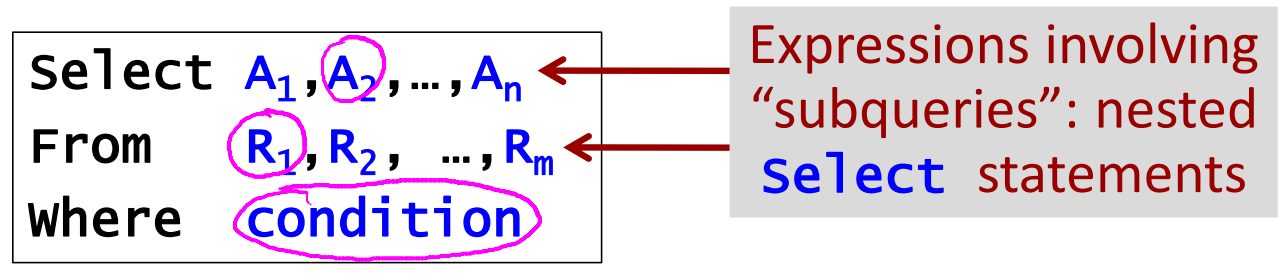

In [240]:
Image(filename="files/from-select.png")

## Students whose scaled GPA changes GPA by more than 1

In [241]:
%%sql
select sID, sName, GPA, GPA*(sizeHS/1000.0) as scaledGPA
from Student
where GPA*(sizeHS/1000.0) - GPA > 1.0
   or GPA - GPA*(sizeHS/1000.0) > 1.0;

Done.


sID,sName,GPA,scaledGPA
234,Bob,3.6,5.4
345,Craig,3.5,1.75
567,Edward,2.9,5.8
678,Fay,3.8,0.76
876,Irene,3.9,1.56
765,Jay,2.9,4.35
543,Craig,3.4,6.8


"We have this expression that scales
the GPA and we actually
have to write the expression out **three** times.
A smart database system
might look at the query and
recognize that it can do
the computation once and use
it in all three places, but maybe
we're not using a smart database system.
And furthermore, for the
query itself, we might
like to simplify things and only write that expression once.
So, simplifying the where cause is actually fairly easy.
We can just use the absolute
value function that's built into most SQL implementation."

Simplify using absolute value function:

In [242]:
%%sql
select sID, sName, GPA, GPA*(sizeHS/1000.0) as scaledGPA
from Student
where abs(GPA*(sizeHS/1000.0) - GPA) > 1.0;

Done.


sID,sName,GPA,scaledGPA
234,Bob,3.6,5.4
345,Craig,3.5,1.75
567,Edward,2.9,5.8
678,Fay,3.8,0.76
876,Irene,3.9,1.56
765,Jay,2.9,4.35
543,Craig,3.4,6.8


"But we
still have to use
the **two** computations here of the scale GPA.
So, what I'm going to do
now is I'm going to
put in the FROM clause
a sub-query and that sub-query
is going to among things compute the scale GPA."

Further simplifying using subquery in FROM:
"When we put a
sub query in the from clause,
what we're doing is creating a
SELECT FROM WHERE statement that
produces a relation, but in
the rest of the query we can
treat that just like a
relation, so we can refer
to the scale GPA in the rest of the query.
Alright, so let me just do a little editing here.
So, I'm going to take this SELECT
from here, this portion
of the query, like that, and
I'm going to turn it into its own
subquery, and put it in the from clause.
Now I'm going to
give it a name G and technically,
I might be able to leave
that out, but most SQL implementations require it."

"This says compute the select
from where expression and call
the result G. And now
in the rest of the query,
anytime I refer to G,
I'm referring to the result of this sub-query in the from. Specifically, I now have
scaled GPA and if
I want, I can put that
it comes from G, although, I don't need to since it's not ambiguous.
And I can use that scaled GPA in the rest of my query.
Now, I'm still missing a SELECT.
So, I'll just put SELECT star
here and I'll get all attributes
back and now, I have
a complete query where I
computed the scale GPA
in the from clause and used it elsewhere in the query."

In [243]:
%%sql
select *
from (select sID, sName, GPA, GPA*(sizeHS/1000.0) as scaledGPA
      from Student) G
where abs(scaledGPA - GPA) > 1.0;

Done.


sID,sName,GPA,scaledGPA
234,Bob,3.6,5.4
345,Craig,3.5,1.75
567,Edward,2.9,5.8
678,Fay,3.8,0.76
876,Irene,3.9,1.56
765,Jay,2.9,4.35
543,Craig,3.4,6.8


And we get the exact same, again.

## Colleges paired with the highest GPA of their applicants (using `all`)

(None of the three queries below will work, because SQLite doesn't support `all`. The next four queries are skipped in this notebook, as they all return errors. Refer to the lecture video for an explanation of these queries.)

In [244]:
%%sql
select College.cName, state, GPA
from College, Apply, Student
where College.cName = Apply.cName
  and Apply.sID = Student.sID
  and GPA >= all
          (select GPA from Student, Apply
           where Student.sID = Apply.sID
             and Apply.cName = College.cName);

(sqlite3.OperationalError) near "all": syntax error [SQL: u'select College.cName, state, GPA\nfrom College, Apply, Student\nwhere College.cName = Apply.cName\n  and Apply.sID = Student.sID\n  and GPA >= all\n          (select GPA from Student, Apply\n           where Student.sID = Apply.sID\n             and Apply.cName = College.cName);']


Add Distinct to remove duplicates

In [245]:
%%sql
select distinct College.cName, state, GPA
from College, Apply, Student
where College.cName = Apply.cName
  and Apply.sID = Student.sID
  and GPA >= all
          (select GPA from Student, Apply
           where Student.sID = Apply.sID
             and Apply.cName = College.cName);

(sqlite3.OperationalError) near "all": syntax error [SQL: u'select distinct College.cName, state, GPA\nfrom College, Apply, Student\nwhere College.cName = Apply.cName\n  and Apply.sID = Student.sID\n  and GPA >= all\n          (select GPA from Student, Apply\n           where Student.sID = Apply.sID\n             and Apply.cName = College.cName);']


Use subquery in Select

In [246]:
%%sql
select distinct cName, state,
  (select distinct GPA
   from Apply, Student
   where College.cName = Apply.cName
     and Apply.sID = Student.sID
     and GPA >= all
           (select GPA from Student, Apply
            where Student.sID = Apply.sID
              and Apply.cName = College.cName)) as GPA
from College;

(sqlite3.OperationalError) near "all": syntax error [SQL: u'select distinct cName, state,\n  (select distinct GPA\n   from Apply, Student\n   where College.cName = Apply.cName\n     and Apply.sID = Student.sID\n     and GPA >= all\n           (select GPA from Student, Apply\n            where Student.sID = Apply.sID\n              and Apply.cName = College.cName)) as GPA\nfrom College;']


Now pair colleges with names of their applicants (doesn't work due to multiple rows in subquery result).

In [247]:
%%sql
select distinct cName, state,
  (select distinct sName
   from Apply, Student
   where College.cName = Apply.cName
     and Apply.sID = Student.sID) as sName
from College;

Done.


cName,state,sName
Berkeley,CA,Amy
Cornell,NY,Amy
MIT,MA,Craig
Stanford,CA,Amy


# JOIN operators

- Works for Postgres
- MySQL doesn't support FULL OUTER JOIN
- SQLite doesn't support RIGHT or FULL OUTER JOIN

The general form of the FROM clause - separating tables with commas - is implicitly a cross product, but it's
also possible to have explicit
join of tables and this
follows the relational Algebra style of join.

Several types of join:

| SQL | Relational Algebra |
|:---:|:------------------:|
|INNER JOIN on *condition*|$\bowtie_\theta$|
|NATURAL JOIN|$\bowtie$|
|INNER JOIN USING(*attrs*)|$\bowtie$ <br> (but explicitely list attributes)|
|LEFT\RIGHT\FULL OUTER JOIN|$\bowtie_\theta$ <br> (except when tuples don't <br> match $\theta$ condition)|

"The fourth type and actually,
the most interesting type is
the outer join and there's
a left outer join, right outer
join and full outer join and
this is again combining tuples
similar to the theta
join except when tuples
don't match the theta condition.
They're still added to the result and patted with no values."

None of these operators add expressive power to SQL, but they can be quite useful
in formulating queries and especially
the outer join is a fairly
complicated to express without the
outer join operator itself.

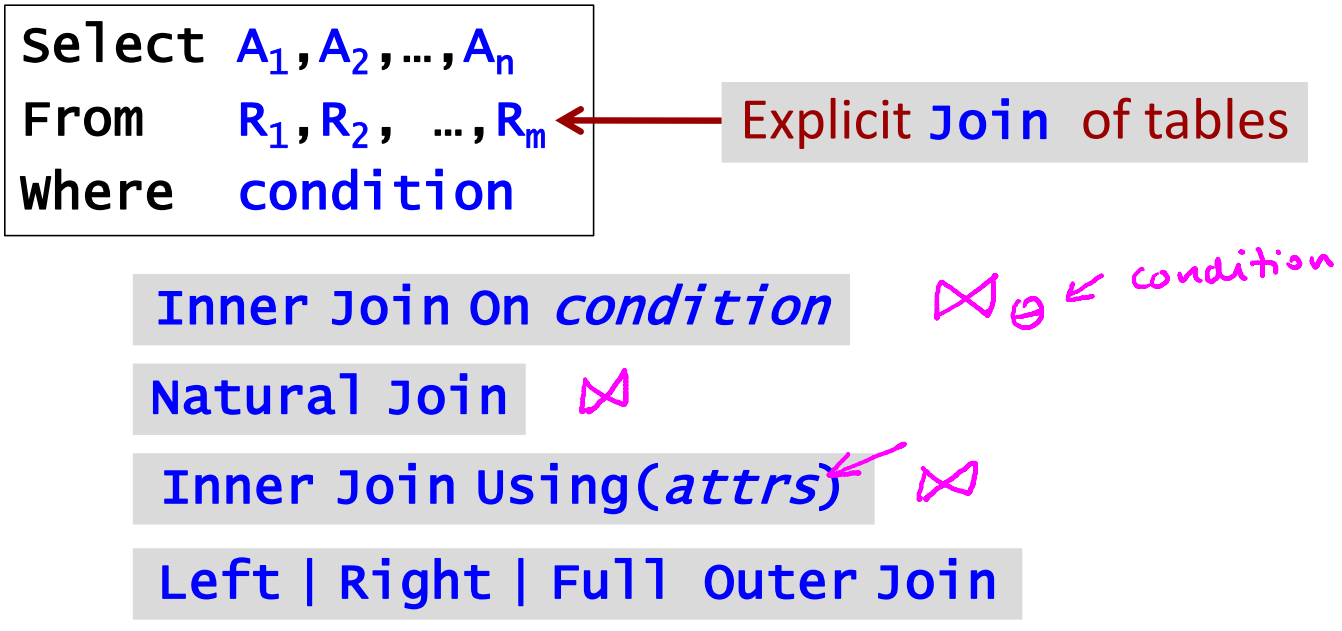

In [248]:
Image(filename="files/join.png")

## INNER JOIN

Student names and majors for which they've applied, using "ordinary" cross product in FROM.

In [249]:
%%sql
select distinct sName, major
from Student, Apply
where Student.sID = Apply.sID;

Done.


sName,major
Amy,CS
Amy,EE
Bob,biology
Craig,CS
Craig,EE
Craig,bioengineering
Fay,history
Helen,CS
Irene,CS
Irene,biology


Rewrite using INNER JOIN

In [250]:
%%sql
select distinct sName, major
from Student inner join Apply
    on Student.sID = Apply.sID;

Done.


sName,major
Amy,CS
Amy,EE
Bob,biology
Craig,CS
Craig,EE
Craig,bioengineering
Fay,history
Helen,CS
Irene,CS
Irene,biology


Abbreviation is `JOIN`. You don't have to write `INNER` to do an inner join, you can just use the abbreviation `JOIN`.

The equivalent to above:

In [251]:
%%sql
select distinct sName, major
from Student join Apply
    on Student.sID = Apply.sID;

Done.


sName,major
Amy,CS
Amy,EE
Bob,biology
Craig,CS
Craig,EE
Craig,bioengineering
Fay,history
Helen,CS
Irene,CS
Irene,biology


## INNER JOIN with additional conditions

Names and GPAs of students with sizeHS < 1000 applying to CS at Stanford. Here with "ordinary" cross product:

In [252]:
%%sql
select sName, GPA
from Student, Apply
where Student.sID = Apply.sID
  and sizeHS < 1000 and major = 'CS' and cName = 'Stanford';

Done.


sName,GPA
Helen,3.7
Irene,3.9


Rewrite using JOIN:

In [253]:
%%sql
select sName, GPA
from Student join Apply
    on Student.sID = Apply.sID
where sizeHS < 1000 and major = 'CS' and cName = 'Stanford';

Done.


sName,GPA
Helen,3.7
Irene,3.9


Can move everything into JOIN ON condition

In [254]:
%%sql
select sName, GPA
from Student join Apply
    on Student.sID = Apply.sID
    and sizeHS < 1000 and major = 'CS' and cName = 'Stanford';

Done.


sName,GPA
Helen,3.7
Irene,3.9


## Three-way INNER JOIN

Application info: ID, name, GPA, college name, enrollment. With "ordinary" cross product:

In [255]:
%%sql
select Apply.sID, sName, GPA, Apply.cName, enrollment
from Apply, Student, College
where Apply.sID = Student.sID and Apply.cName = College.cName;

Done.


sID,sName,GPA,cName,enrollment
123,Amy,3.9,Stanford,15000
123,Amy,3.9,Stanford,15000
123,Amy,3.9,Berkeley,36000
123,Amy,3.9,Cornell,21000
234,Bob,3.6,Berkeley,36000
345,Craig,3.5,MIT,10000
345,Craig,3.5,Cornell,21000
345,Craig,3.5,Cornell,21000
345,Craig,3.5,Cornell,21000
678,Fay,3.8,Stanford,15000


Rewrite using three-way JOIN. (Works in SQLite and MySQL but not Postgres.)

In [256]:
%%sql
select Apply.sID, sName, GPA, Apply.cName, enrollment
from Apply join Student join College
    on Apply.sID = Student.sID and Apply.cName = College.cName;

Done.


sID,sName,GPA,cName,enrollment
123,Amy,3.9,Stanford,15000
123,Amy,3.9,Stanford,15000
123,Amy,3.9,Berkeley,36000
123,Amy,3.9,Cornell,21000
234,Bob,3.6,Berkeley,36000
345,Craig,3.5,MIT,10000
345,Craig,3.5,Cornell,21000
345,Craig,3.5,Cornell,21000
345,Craig,3.5,Cornell,21000
678,Fay,3.8,Stanford,15000


Rewrite using binary JOIN, for systems that don't support three-way join.

In [257]:
%%sql
select Apply.sID, sName, GPA, Apply.cName, enrollment
from (Apply join Student on Apply.sID = Student.sID) join College 
    on Apply.cName = College.cName;

Done.


sID,sName,GPA,cName,enrollment
123,Amy,3.9,Stanford,15000
123,Amy,3.9,Stanford,15000
123,Amy,3.9,Berkeley,36000
123,Amy,3.9,Cornell,21000
234,Bob,3.6,Berkeley,36000
345,Craig,3.5,MIT,10000
345,Craig,3.5,Cornell,21000
345,Craig,3.5,Cornell,21000
345,Craig,3.5,Cornell,21000
678,Fay,3.8,Stanford,15000


## Natural JOIN

Student names and majors for which they've applied. First, the equivalent with INNER JOIN:

In [258]:
%%sql
select distinct sName, major
from Student inner join Apply
on Student.sID = Apply.sID;

Done.


sName,major
Amy,CS
Amy,EE
Bob,biology
Craig,CS
Craig,EE
Craig,bioengineering
Fay,history
Helen,CS
Irene,CS
Irene,biology


Rewrite using NATURAL JOIN (let's us skip the the `ON` clause)

In [259]:
%%sql
select distinct sName, major
from Student natural join Apply;

Done.


sName,major
Amy,CS
Amy,EE
Bob,biology
Craig,CS
Craig,EE
Craig,bioengineering
Fay,history
Helen,CS
Irene,CS
Irene,biology


Like in relational algebra, it eliminates duplicate columns.

In [260]:
%%sql 
select * 
from Student natural join Apply;

Done.


sID,sName,GPA,sizeHS,cName,major,decision
123,Amy,3.9,1000,Stanford,CS,Y
123,Amy,3.9,1000,Stanford,EE,N
123,Amy,3.9,1000,Berkeley,CS,Y
123,Amy,3.9,1000,Cornell,EE,Y
234,Bob,3.6,1500,Berkeley,biology,N
345,Craig,3.5,500,MIT,bioengineering,Y
345,Craig,3.5,500,Cornell,bioengineering,N
345,Craig,3.5,500,Cornell,CS,Y
345,Craig,3.5,500,Cornell,EE,N
678,Fay,3.8,200,Stanford,history,Y


In [261]:
%%sql select distinct sID 
from Student natural join Apply;

Done.


sID
123
234
345
543
678
765
876
987


Would get ambiguity error with cross-product:

In [262]:
%%sql 
select distinct sID 
from Student, Apply;

(sqlite3.OperationalError) ambiguous column name: sID [SQL: u'select distinct sID \nfrom Student, Apply;']


## Natural JOIN with additional conditions

Names and GPAs of students with sizeHS < 1000 applying to CS at Stanford.

In [263]:
%%sql
select sName, GPA
from Student join Apply
on Student.sID = Apply.sID
where sizeHS < 1000 and major = 'CS' and cName = 'Stanford';

Done.


sName,GPA
Helen,3.7
Irene,3.9


Rewrite using natural JOIN

In [264]:
%%sql
select sName, GPA
from Student natural join Apply
where sizeHS < 1000 and major = 'CS' and cName = 'Stanford';

Done.


sName,GPA
Helen,3.7
Irene,3.9


### USING clause

USING clause considered safer/better practice than NATURAL JOIN. The USING clause explicitely list the attributes that should be equated across the two relations.

In [265]:
%%sql
select sName, GPA
from Student join Apply using(sID)
where sizeHS < 1000 and major = 'CS' and cName = 'Stanford';

Done.


sName,GPA
Helen,3.7
Irene,3.9


## Self-JOIN

Query: Pairs of students with same GPA

In [266]:
%%sql
select S1.sID, S1.sName, S1.GPA, S2.sID, S2.sName, S2.GPA
from Student S1, Student S2
where S1.GPA = S2.GPA and S1.sID < S2.sID;

Done.


sID,sName,GPA,sID_1,sName_1,GPA_1
123,Amy,3.9,456,Doris,3.9
123,Amy,3.9,876,Irene,3.9
123,Amy,3.9,654,Amy,3.9
456,Doris,3.9,876,Irene,3.9
456,Doris,3.9,654,Amy,3.9
567,Edward,2.9,765,Jay,2.9
654,Amy,3.9,876,Irene,3.9
543,Craig,3.4,789,Gary,3.4


Rewrite using JOIN and USING (disallowed to have *both* an ON and a USING clause at the same time, in most SQL systems).

In [267]:
%%sql
select S1.sID, S1.sName, S1.GPA, S2.sID, S2.sName, S2.GPA
from Student S1 join Student S2 on S1.sID < S2.sID using(GPA);

(sqlite3.OperationalError) cannot have both ON and USING clauses in the same join [SQL: u'select S1.sID, S1.sName, S1.GPA, S2.sID, S2.sName, S2.GPA\nfrom Student S1 join Student S2 on S1.sID < S2.sID using(GPA);']


Rewrite without the ON clause, simply by using a where in stead of the ON:

In [268]:
%%sql
select S1.sID, S1.sName, S1.GPA, S2.sID, S2.sName, S2.GPA
from Student S1 join Student S2 using(GPA)
where S1.sID < S2.sID;

Done.


sID,sName,GPA,sID_1,sName_1,GPA_1
123,Amy,3.9,456,Doris,3.9
123,Amy,3.9,876,Irene,3.9
123,Amy,3.9,654,Amy,3.9
456,Doris,3.9,876,Irene,3.9
456,Doris,3.9,654,Amy,3.9
567,Edward,2.9,765,Jay,2.9
654,Amy,3.9,876,Irene,3.9
543,Craig,3.4,789,Gary,3.4


## Self natural JOIN

In [269]:
%%sql select * 
from Student S1 natural join Student S2;

Done.


sID,sName,GPA,sizeHS
123,Amy,3.9,1000
234,Bob,3.6,1500
345,Craig,3.5,500
456,Doris,3.9,1000
567,Edward,2.9,2000
678,Fay,3.8,200
789,Gary,3.4,800
987,Helen,3.7,800
876,Irene,3.9,400
765,Jay,2.9,1500


Verify equivalence to Student:

In [270]:
%sql select * from Student;

Done.


sID,sName,GPA,sizeHS
123,Amy,3.9,1000
234,Bob,3.6,1500
345,Craig,3.5,500
456,Doris,3.9,1000
567,Edward,2.9,2000
678,Fay,3.8,200
789,Gary,3.4,800
987,Helen,3.7,800
876,Irene,3.9,400
765,Jay,2.9,1500


Similar output (but could be in a different order).

## Left outer JOIN

The "most interesting" JOIN, the OUTER JOIN.

Query: Student application info: name, ID, college name, major

In [271]:
%%sql
select sName, sID, cName, major
from Student inner join Apply using(sID);

Done.


sName,sID,cName,major
Amy,123,Stanford,CS
Amy,123,Stanford,EE
Amy,123,Berkeley,CS
Amy,123,Cornell,EE
Bob,234,Berkeley,biology
Craig,345,MIT,bioengineering
Craig,345,Cornell,bioengineering
Craig,345,Cornell,CS
Craig,345,Cornell,EE
Fay,678,Stanford,history


Suppose we want to include in the query students who haven't applied anywhere yet. This is where the LEFT OUTER JOIN comes in handy.

In [272]:
%%sql
select sName, sID, cName, major
from Student left outer join Apply using(sID);

Done.


sName,sID,cName,major
Amy,123,Stanford,CS
Amy,123,Stanford,EE
Amy,123,Berkeley,CS
Amy,123,Cornell,EE
Bob,234,Berkeley,biology
Craig,345,MIT,bioengineering
Craig,345,Cornell,bioengineering
Craig,345,Cornell,CS
Craig,345,Cornell,EE
Doris,456,None,None


**NB**: notice the `None` values in some of the tuples (e.g. Doris and Edward). This is equivalent to NULL values. (In some systems the resulting cells are rather empty than containing a 'None' - this might just be the nature of data frames in Python Jupyter.)

Abbreviation is LEFT JOIN (OUTER can be skipped):

In [273]:
%%sql
select sName, sID, cName, major
from Student left join Apply using(sID);

Done.


sName,sID,cName,major
Amy,123,Stanford,CS
Amy,123,Stanford,EE
Amy,123,Berkeley,CS
Amy,123,Cornell,EE
Bob,234,Berkeley,biology
Craig,345,MIT,bioengineering
Craig,345,Cornell,bioengineering
Craig,345,Cornell,CS
Craig,345,Cornell,EE
Doris,456,None,None


Using NATURAL OUTER JOIN (again, not that recommended from a good practice standpoint).

In [274]:
%%sql
select sName, sID, cName, major
from Student natural left outer join Apply;

Done.


sName,sID,cName,major
Amy,123,Stanford,CS
Amy,123,Stanford,EE
Amy,123,Berkeley,CS
Amy,123,Cornell,EE
Bob,234,Berkeley,biology
Craig,345,MIT,bioengineering
Craig,345,Cornell,bioengineering
Craig,345,Cornell,CS
Craig,345,Cornell,EE
Doris,456,None,None


Can make the equivalent query without any JOIN operators, but as you can see it is rather verbose:

In [275]:
%%sql
select sName, Student.sID, cName, major
from Student, Apply
where Student.sID = Apply.sID
union
select sName, sID, NULL, NULL
from Student
where sID not in (select sID from Apply);

Done.


sName,sID,cName,major
Amy,123,Berkeley,CS
Amy,123,Cornell,EE
Amy,123,Stanford,CS
Amy,123,Stanford,EE
Amy,654,None,None
Bob,234,Berkeley,biology
Craig,345,Cornell,CS
Craig,345,Cornell,EE
Craig,345,Cornell,bioengineering
Craig,345,MIT,bioengineering


In our query we retain the all Student tuples whether or not they matched an Spply tuple. What if we want to do things the other way around; we want to retain Apply tuples whether or not they match the Student tuple. To do that we could simply swap the order of Apply and Student in FROM.

We currently don't have any Apply tuples that don't match, so we will add a couple of tuples like that.

Query: Instead include applications without matching students

In [276]:
%%sql
insert into Apply values (321, 'MIT', 'history', 'N');
insert into Apply values (321, 'MIT', 'psychology', 'Y');

select sName, sID, cName, major
from Apply natural left outer join Student;

1 rows affected.
1 rows affected.
Done.


sName,sID,cName,major
Amy,123,Stanford,CS
Amy,123,Stanford,EE
Amy,123,Berkeley,CS
Amy,123,Cornell,EE
Bob,234,Berkeley,biology
Craig,345,MIT,bioengineering
Craig,345,Cornell,bioengineering
Craig,345,Cornell,CS
Craig,345,Cornell,EE
Fay,678,Stanford,history


We can see that the two added tuples are included at the bottom, even though we have no matching student name.

## RIGHT OUTER JOIN

Actually, we don't have to swap Apply and Student, we can simply use the RIGHT OUTER JOIN instead. (NOT supported by SQLite systems, as is also the case with FULL OUTER JOIN).

Query: Student application info: name, ID, college name, major, and include applications without matching students (equivalent to the query above).

In [277]:
%%sql
select sName, sID, cName, major
from Student natural right outer join Apply;

(sqlite3.OperationalError) RIGHT and FULL OUTER JOINs are not currently supported [SQL: u'select sName, sID, cName, major\nfrom Student natural right outer join Apply;']


## FULL OUTER JOIN

To get unmatched tuples from both the left and the right appear in our result, use the FULL OUTER JOIN.

FULL OUTER JOIN not supported by SQLite.

Query: Student application info, include students who haven't applied anywhere and applications without matching students.

In [278]:
%%sql
select sName, sID, cName, major
from Student full outer join Apply using(sID);

(sqlite3.OperationalError) RIGHT and FULL OUTER JOINs are not currently supported [SQL: u'select sName, sID, cName, major\nfrom Student full outer join Apply using(sID);']


Can simulate (make equivalent query) with LEFT and RIGHT outerjoins. Note UNION eliminates duplicates.

In [279]:
%%sql
select sName, sID, cName, major
from Student left outer join Apply using(sID)
union
select sName, sID, cName, major
from Student right outer join Apply using(sID);

(sqlite3.OperationalError) RIGHT and FULL OUTER JOINs are not currently supported [SQL: u'select sName, sID, cName, major\nfrom Student left outer join Apply using(sID)\nunion\nselect sName, sID, cName, major\nfrom Student right outer join Apply using(sID);']


Can simulate (make equivalent query) without any JOIN operators, but rather verbose:

In [280]:
%%sql
select sName, Student.sID, cName, major
from Student, Apply
where Student.sID = Apply.sID
union
select sName, sID, NULL, NULL
from Student
where sID not in (select sID from Apply)
union
select NULL, sID, cName, major
from Apply
where sID not in (select sID from Student);

Done.


sName,sID,cName,major
None,321,MIT,history
None,321,MIT,psychology
Amy,123,Berkeley,CS
Amy,123,Cornell,EE
Amy,123,Stanford,CS
Amy,123,Stanford,EE
Amy,654,None,None
Bob,234,Berkeley,biology
Craig,345,Cornell,CS
Craig,345,Cornell,EE


### Commutativity 

`(A op B) = (B op A)` - generally true for SQL, except for LEFT and RIGHT OUTER JOIN.

### Associativety

"You can do operations in any order first."

`(A op B) op C = A op (B op C)` - generally true for SQL, but the OUTER JOIN is not associative.

### Examples of non-behaviour of commutativity and associativity in OUTER JOIN queries

The queries below illustrate the points with commutativity and associativity in OUTER JOINS.

(The queries are not exectued, as FULL OUTER JOIN is not supported by SQLite.)

```sql
create table T1 (A int, B int);
create table T2 (B int, C int);
create table T3 (A int, C int);
insert into T1 values (1,2);
insert into T2 values (2,3);
insert into T3 values (4,5);

select A,B,C
from (T1 natural full outer join T2) natural full outer join T3;

select A,B,C
from T1 natural full outer join (T2 natural full outer join T3);

drop table T1;
drop table T2;
drop table T3;
```

# Aggregation

Works for SQLite, MySQL. Postgres doesn't allow ambiguous Select columns in Group-by queries.

They perform computations over
sets of values in multiple rows of our relations,
and the basic aggregation functions supported by every SQL system are
*minimum, maximum, some, average and count*.

Also add two new helpful clauses:

- GROUP BY: allows us to partition our relations into groups
and then will compute aggregated aggregate functions over each group independently.
- HAVING: allows us to test
filters on the results of aggregate values.
The WHERE condition applies to single rows at a time.
The HAVING condition will apply to the groups that we generate from the GROUP BY clause.

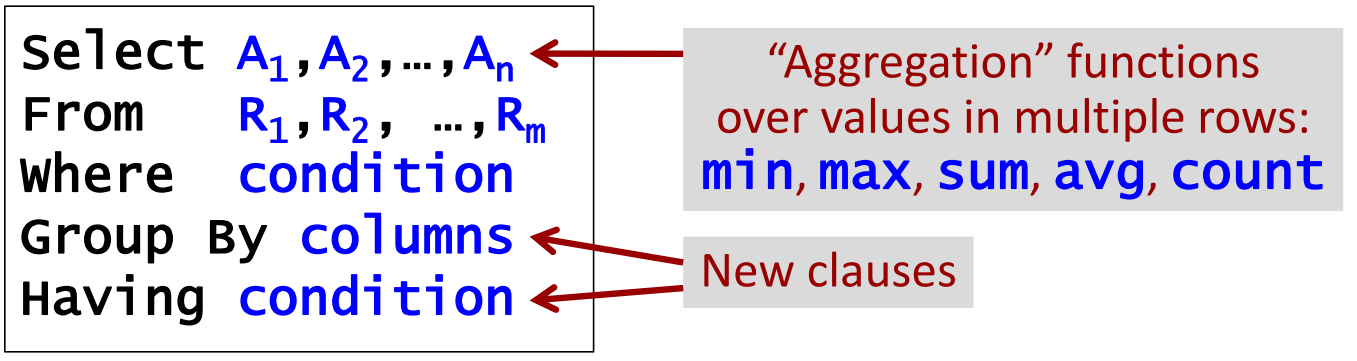

In [281]:
Image(filename="files/aggregation.png")

## Average GPA of all students

In [282]:
%%sql
select avg(GPA)
from Student;

Done.


avg(GPA)
3.56666666667


## Lowest GPA of students applying to CS

Query: finds is the minimum GPA of students who have applied for a 
CS major.

In [283]:
%%sql
select min(GPA)
from Student, Apply
where Student.sID = Apply.sID and major = 'CS';

Done.


min(GPA)
3.4


Query: Average GPA of students applying to CS

In [284]:
%%sql
select avg(GPA)
from Student, Apply
where Student.sID = Apply.sID and major = 'CS';

Done.


avg(GPA)
3.71428571429


**Issue with above query**: if a student
applied to CS
multiple times for example student 123 Amy applied to both Stanford
and Berkeley.
Then When we compute their average GPA we're going to be counting their GPA twice.

Presumably, we want to count the GPA once for each student who applied to CS.

Query: Fix incorrect counting of GPAs

In [285]:
%%sql
select avg(GPA)
from Student
where sID in (select sID from Apply where major = 'CS');

Done.


avg(GPA)
3.68


## Number of colleges bigger than 15,000

COUNT function.

In [286]:
%%sql
select count(*)
from College
where enrollment > 15000;

Done.


count(*)
2


## Number of students applying to Cornell

In [287]:
%%sql
select count(*)
from Apply
where cName = 'Cornell';

Done.


count(*)
6


**Issue with above query**: we have counted the number of applications to Cornell, not the number of students applying to cornell (one student can have multiple applications).

The query below shows why the result is incorrect:

In [288]:
%%sql
select *
from Apply
where cName = 'Cornell';

Done.


sID,cName,major,decision
123,Cornell,EE,Y
345,Cornell,bioengineering,N
345,Cornell,CS,Y
345,Cornell,EE,N
765,Cornell,history,N
765,Cornell,psychology,Y


In [289]:
%%sql
select Count(Distinct sID)
from Apply
where cName = 'Cornell';

Done.


Count(Distinct sID)
3


By using the keyword COUNT DISTINCT, we can avoid double counting.

## Students such that number of other students with same GPA is equal to number of other students with same sizeHS

Query: all students
where the number of other students who have the same GPA as the student
is equal to the number of other student that have the same high school size as
the student.

In [290]:
%%sql
select *
from Student S1
where (select count(*) from Student S2
       where S2.sID <> S1.sID and S2.GPA = S1.GPA) =
      (select count(*) from Student S2
       where S2.sID <> S1.sID and S2.sizeHS = S1.sizeHS);

Done.


sID,sName,GPA,sizeHS
345,Craig,3.5,500
567,Edward,2.9,2000
678,Fay,3.8,200
789,Gary,3.4,800
765,Jay,2.9,1500
543,Craig,3.4,2000


##   Amount by which average GPA of students applying to CS exceeds average of students not applying to CS

Query: the amount by which the average GPA of students
who apply to computer science exceeds the average GPA of students who don't
apply to computer science, and we are going to assume it does in fact exceed.

In [291]:
%%sql
select CS.avgGPA - NonCS.avgGPA
from (select avg(GPA) as avgGPA from Student
      where sID in (
         select sID from Apply where major = 'CS')) as CS,
     (select avg(GPA) as avgGPA from Student
      where sID not in (
         select sID from Apply where major = 'CS')) as NonCS;

Done.


avgGPA
0.194285714286


Same query using subqueries in SELECT:

In [292]:
%%sql
select (select avg(GPA) as avgGPA from Student
        where sID in (
           select sID from Apply where major = 'CS')) -
       (select avg(GPA) as avgGPA from Student
        where sID not in (
           select sID from Apply where major = 'CS')) as d
from Student;

Done.


d
0.194285714286
0.194285714286
0.194285714286
0.194285714286
0.194285714286
0.194285714286
0.194285714286
0.194285714286
0.194285714286
0.194285714286


The reason for the duplicates is that we compute this result once for each tuple in
student.

Remove duplicates by adding distinct:

In [293]:
%%sql
select distinct (select avg(GPA) as avgGPA from Student
        where sID in (
           select sID from Apply where major = 'CS')) -
       (select avg(GPA) as avgGPA from Student
        where sID not in (
           select sID from Apply where major = 'CS')) as d
from Student;

Done.


d
0.194285714286


## GROUP BY

GROUP BY is only used in conjunction with aggregate.

Effectively what grouping does, is it takes a relation
and it partitions it by values of a given attribute or set of attributes.
Specifically in this query we're taking the apply relation
and we're breaking into groups
where each group has one of the college names, so it'll be the Stanford group, the
Berkeley group and so forth
and then for each group we will return one tuple in the result
containing the
college name for that group and the number of tuples in the group.

Query: Number of applications to each college.

In [294]:
%%sql
select cName, count(*)
from Apply
group by cName;

Done.


cName,count(*)
Berkeley,3
Cornell,6
MIT,6
Stanford,6


The see the grouping:

In [295]:
%%sql
select *
from Apply
order by cName;

Done.


sID,cName,major,decision
123,Berkeley,CS,Y
234,Berkeley,biology,N
987,Berkeley,CS,Y
123,Cornell,EE,Y
345,Cornell,bioengineering,N
345,Cornell,CS,Y
345,Cornell,EE,N
765,Cornell,history,N
765,Cornell,psychology,Y
345,MIT,bioengineering,Y


Now back to query we want 

In [296]:
%%sql
select cName, count(*)
from Apply
group by cName;

Done.


cName,count(*)
Berkeley,3
Cornell,6
MIT,6
Stanford,6


## College enrollments by state

Query: total enrollment of college students
for each state.

In [297]:
%%sql
select state, sum(enrollment)
from College
group by state;

Done.


state,sum(enrollment)
CA,51000
MA,10000
NY,21000


## Minimum + maximum GPAs of applicants to each college & major

A more complicated GROUP BY query: for each college and major combination, find
the minimum and maximum GPAs for the students who've applied to that college.

In [298]:
%%sql
select cName, major, min(GPA), max(GPA)
from Student, Apply
where Student.sID = Apply.sID
group by cName, major;

Done.


cName,major,min(GPA),max(GPA)
Berkeley,CS,3.7,3.9
Berkeley,biology,3.6,3.6
Cornell,CS,3.5,3.5
Cornell,EE,3.5,3.9
Cornell,bioengineering,3.5,3.5
Cornell,history,2.9,2.9
Cornell,psychology,2.9,2.9
MIT,CS,3.4,3.4
MIT,bioengineering,3.5,3.5
MIT,biology,3.9,3.9


To view the grouping:

In [299]:
%%sql
select cName, major, GPA
from Student, Apply
where Student.sID = Apply.sID
order by cName, major;

Done.


cName,major,GPA
Berkeley,CS,3.9
Berkeley,CS,3.7
Berkeley,biology,3.6
Cornell,CS,3.5
Cornell,EE,3.9
Cornell,EE,3.5
Cornell,bioengineering,3.5
Cornell,history,2.9
Cornell,psychology,2.9
MIT,CS,3.4


Now back to query we want

In [300]:
%%sql
select cName, major, min(GPA), max(GPA)
from Student, Apply
where Student.sID = Apply.sID
group by cName, major;

Done.


cName,major,min(GPA),max(GPA)
Berkeley,CS,3.7,3.9
Berkeley,biology,3.6,3.6
Cornell,CS,3.5,3.5
Cornell,EE,3.5,3.9
Cornell,bioengineering,3.5,3.5
Cornell,history,2.9,2.9
Cornell,psychology,2.9,2.9
MIT,CS,3.4,3.4
MIT,bioengineering,3.5,3.5
MIT,biology,3.9,3.9


Query: Widest spread between min(GPA) and max(GPA).

In [301]:
%%sql
select max(mx-mn)
from (select cName, major, min(GPA) as mn, max(GPA) as mx
      from Student, Apply
      where Student.sID = Apply.sID
      group by cName, major) M;

Done.


max(mx-mn)
0.9


## Number of colleges applied to by each student

Query: the number of colleges that have been applied to by each student.

In [302]:
%%sql
select Student.sID, count(distinct cName)
from Student, Apply
where Student.sID = Apply.sID
group by Student.sID;

Done.


sID,count(distinct cName)
123,3
234,1
345,2
543,1
678,1
765,2
876,2
987,2


Query to picture grouping:

In [303]:
%%sql
select Student.sID, cName
from Student, Apply
where Student.sID = Apply.sID
order by Student.sID;

Done.


sID,cName
123,Stanford
123,Stanford
123,Berkeley
123,Cornell
234,Berkeley
345,MIT
345,Cornell
345,Cornell
345,Cornell
543,MIT


Now back to query we want

In [304]:
%%sql
select Student.sID, count(distinct cName)
from Student, Apply
where Student.sID = Apply.sID
group by Student.sID;

Done.


sID,count(distinct cName)
123,3
234,1
345,2
543,1
678,1
765,2
876,2
987,2


Add student name column to resulting relation:

In [305]:
%%sql
select Student.sID, sName, count(distinct cName)
from Student, Apply
where Student.sID = Apply.sID
group by Student.sID;

Done.


sID,sName,count(distinct cName)
123,Amy,3
234,Bob,1
345,Craig,2
543,Craig,1
678,Fay,1
765,Jay,2
876,Irene,2
987,Helen,2


**NB**: this worked fine for this query, but adding a column name to SELECT doesn't always work. the only reason that it worked nicely in this case is that when we
group buy the student ID
within each group
we have the same student name.

Let's take a look at that:

In [306]:
%%sql
select Student.sID, sName, cName
from Student, Apply
where Student.sID = Apply.sID
order by Student.sID;

Done.


sID,sName,cName
123,Amy,Stanford
123,Amy,Stanford
123,Amy,Berkeley
123,Amy,Cornell
234,Bob,Berkeley
345,Craig,MIT
345,Craig,Cornell
345,Craig,Cornell
345,Craig,Cornell
543,Craig,MIT


I.e. it was ok because for each group (Student.sID)
we had the same name of the student. This is not necessarily the case, as we'll see in the next example (add college).

Now back to query we want:

In [307]:
%%sql
select Student.sID, sName, count(distinct cName)
from Student, Apply
where Student.sID = Apply.sID
group by Student.sID;

Done.


sID,sName,count(distinct cName)
123,Amy,3
234,Bob,1
345,Craig,2
543,Craig,1
678,Fay,1
765,Jay,2
876,Irene,2
987,Helen,2


Add college (shouldn't work but does in some systems)

In [308]:
%%sql
select Student.sID, sName, count(distinct cName), cName
from Student, Apply
where Student.sID = Apply.sID
group by Student.sID;

Done.


sID,sName,count(distinct cName),cName
123,Amy,3,Cornell
234,Bob,1,Berkeley
345,Craig,2,Cornell
543,Craig,1,MIT
678,Fay,1,Stanford
765,Jay,2,Cornell
876,Irene,2,MIT
987,Helen,2,Berkeley


This query is incorrect: e.g. Amy applied for 3 colleges but only Cornell is returned (for some reason). Note that this (incorrect) query doesn't produce an error, but rather an incorrect one.

Back to query to picture grouping:

In [309]:
%%sql
select Student.sID, sName, cName
from Student, Apply
where Student.sID = Apply.sID
order by Student.sID;

Done.


sID,sName,cName
123,Amy,Stanford
123,Amy,Stanford
123,Amy,Berkeley
123,Amy,Cornell
234,Bob,Berkeley
345,Craig,MIT
345,Craig,Cornell
345,Craig,Cornell
345,Craig,Cornell
543,Craig,MIT


Explanation: It actually chooses a random value from the group to include
in the case of the student name the random value was always the same because the
student name is always the same for the same student ID.
In the case of the college it shows a random value among the colleges.

SQLite and MySQL allows for this behavior, which prof Widom is not too fond of.

## Number of colleges applied to by each student, including 0 for those who applied nowhere

Back to the initIal query: 

In [310]:
%%sql
select Student.sID, count(distinct cName)
from Student, Apply
where Student.sID = Apply.sID
group by Student.sID;

Done.


sID,count(distinct cName)
123,3
234,1
345,2
543,1
678,1
765,2
876,2
987,2


There may some students in the database who haven't applied to any
college at all and they're not going to be represented in our result because
they're not going to be in the results of the join and we don't see any zero
counts here.
What if we wanted to actually lift the student IDs of students who haven't
applied anywhere and include a zero in the result?

To solve this we're going to take the UNION of the students who have applied somewhere and the number of
places they've applied
together with the students who haven't applied anywhere and for those students
we're going to
put a zero in the result directly.

In [311]:
%%sql
select Student.sID, count(distinct cName)
from Student, Apply
where Student.sID = Apply.sID
group by Student.sID
union
select sID, 0
from Student
where sID not in (select sID from Apply);

Done.


sID,count(distinct cName)
123,3
234,1
345,2
456,0
543,1
567,0
654,0
678,1
765,2
789,0


## Colleges with fewer than 5 applications (HAVING)

The HAVING clause is also used only in conjunction with aggregation.

What the HAVING clause allows us to do is apply conditions to the results of
aggregate functions.
So the HAVING clause is applied
after the GROUP BY clause and it allows us to check conditions that involve the
entire group.
In contrast the WHERE clause applies to one tuple at a time.

Query: finding colleges that have
fewer than five applicants.

In [312]:
%%sql
select cName
from Apply
group by cName
having count(*) < 5;

Done.


cName
Berkeley


(The result may differ from the one in the lecture, because in he JOIN lecture two tuples to Apply (two applications to MIT) were added.)

Same query without GROUP BY or HAVING:

In [313]:
%%sql
select cName
from Apply A1
where 5 > (select count(*) from Apply A2 where A2.cName = A1.cName);

Done.


cName
Berkeley
Berkeley
Berkeley


Remove duplicates:

In [314]:
%%sql
select distinct cName
from Apply A1
where 5 > (select count(*) from Apply A2 where A2.cName = A1.cName);

Done.


cName
Berkeley


In fact: every query that can be written with the GROUP BY and a HAVING
clause can be written in another form sometime, but it can be in extremely
contorted.

Query: Back to original Group-by form, but now with fewer than 5 *applicants*:

In [315]:
%%sql
select cName
from Apply
group by cName
having count(distinct sID) < 5;

Done.


cName
Berkeley
Cornell
MIT


## Majors whose applicant's maximum GPA is below the average

Query: all majors represented in the database where the
maximum GPA of a student applying for that major is lower than the average
GPA in the database.

In [316]:
%%sql
select major
from Student, Apply
where Student.sID = Apply.sID
group by major
having max(GPA) < (select avg(GPA) from Student);

Done.


major
bioengineering
psychology


# NULL values

Works for SQLite, MySQL, Postgres.

"In relational databases,
unless specified otherwise, any value
in an attribute can take on the special value NULL.
Null is usually used to
mean that the value is undefined or unknown.
For example, we might have
a student whose GPA is unknown
or who doesn't have a GPA,
and we would represent that in our data with NULL.
Or we might create our
reply relation with the decisions
not yet decided, and those
decision values would also be NULL.
So what we're going to look
at in our demo queries is what
happens when we have NULL
values and we run queries over the database."

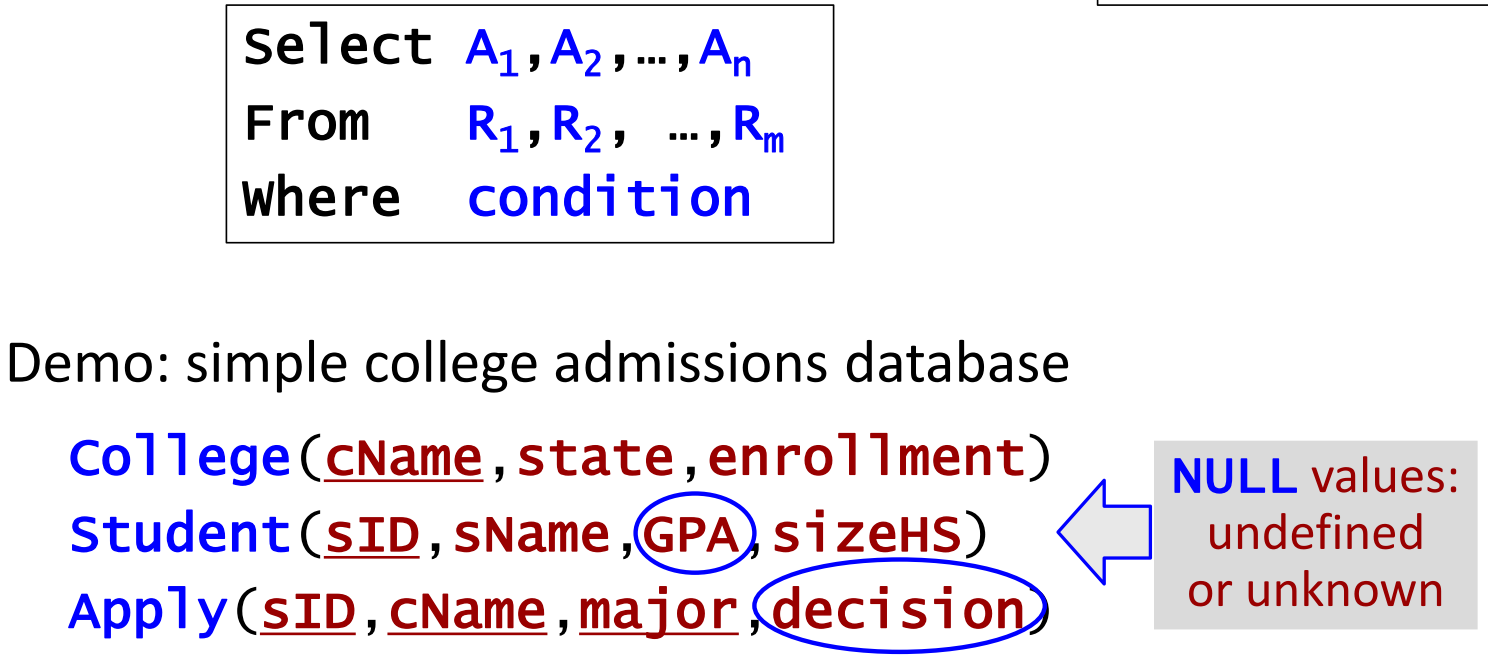

In [317]:
Image(filename="files/null.png")

In order to explore what happens
when we have null values, let's insert
two new students, Kevin and
Laurie, each of which have a null GPA:

In [318]:
%%sql
insert into Student values (432, 'Kevin', null, 1500);
insert into Student values (321, 'Lori', null, 2500);
select * from Student;

1 rows affected.
1 rows affected.
Done.


sID,sName,GPA,sizeHS
123,Amy,3.9,1000
234,Bob,3.6,1500
345,Craig,3.5,500
456,Doris,3.9,1000
567,Edward,2.9,2000
678,Fay,3.8,200
789,Gary,3.4,800
987,Helen,3.7,800
876,Irene,3.9,400
765,Jay,2.9,1500


(As opposed to in the SQL viewer used in the lectures, where NULL values are represented as blank cells, in Jupyter with SQL magic they ar represented as cells containing `None`.)

## All students with high GPA

Query: find students whose GPA is greater than 3.5.

In [319]:
%%sql
select sID, sName, GPA
from Student
where GPA > 3.5;

Done.


sID,sName,GPA
123,Amy,3.9
234,Bob,3.6
456,Doris,3.9
678,Fay,3.8
987,Helen,3.7
876,Irene,3.9
654,Amy,3.9


We don't get the results for Kevin and Lori,
because their GPAs are null,
so we can't determine that they're greater than 3.5.

Query: GPA less than or equal to 3.5.

In [320]:
%%sql
select sID, sName, GPA
from Student
where GPA <= 3.5;

Done.


sID,sName,GPA
345,Craig,3.5
567,Edward,2.9
789,Gary,3.4
765,Jay,2.9
543,Craig,3.4


...we still don't get the results for Kevin and Lori.

Query: GPA
to be greater than 3.5 or less than or equal to 3.5.

In [321]:
%%sql
select sID, sName, GPA
from Student
where GPA > 3.5 or GPA <= 3.5;

Done.


sID,sName,GPA
123,Amy,3.9
234,Bob,3.6
345,Craig,3.5
456,Doris,3.9
567,Edward,2.9
678,Fay,3.8
789,Gary,3.4
987,Helen,3.7
876,Irene,3.9
765,Jay,2.9


Note: one might think that the above query should return every tuple, but it still doesn't get
Kevin or Lori, because we can't
determine that their GPA satisfies
either of these conditions.

Query: see all students.

In [322]:
%%sql
select sID, sName from Student;

Done.


sID,sName
123,Amy
234,Bob
345,Craig
456,Doris
567,Edward
678,Fay
789,Gary
987,Helen
876,Irene
765,Jay


Now use 'is NULL', to include NULL values in the query as well:

In [323]:
%%sql
select sID, sName, GPA
from Student
where GPA > 3.5 or GPA <= 3.5 or GPA is null;

Done.


sID,sName,GPA
123,Amy,3.9
234,Bob,3.6
345,Craig,3.5
456,Doris,3.9
567,Edward,2.9
678,Fay,3.8
789,Gary,3.4
987,Helen,3.7
876,Irene,3.9
765,Jay,2.9


## All students with high GPA or small HS

In [324]:
%%sql
select sID, sName, GPA, sizeHS
from Student
where GPA > 3.5 or sizeHS < 1600;

Done.


sID,sName,GPA,sizeHS
123,Amy,3.9,1000
234,Bob,3.6,1500
345,Craig,3.5,500
456,Doris,3.9,1000
678,Fay,3.8,200
789,Gary,3.4,800
987,Helen,3.7,800
876,Irene,3.9,400
765,Jay,2.9,1500
654,Amy,3.9,1000


Since Kevin satisfy the second part of the WHERE condition, he is included in the results.

Add large HS (i.e. all HS):

In [325]:
%%sql
select sID, sName, GPA, sizeHS
from Student
where GPA > 3.5 or sizeHS < 1600 or sizeHS >= 1600;

Done.


sID,sName,GPA,sizeHS
123,Amy,3.9,1000
234,Bob,3.6,1500
345,Craig,3.5,500
456,Doris,3.9,1000
567,Edward,2.9,2000
678,Fay,3.8,200
789,Gary,3.4,800
987,Helen,3.7,800
876,Irene,3.9,400
765,Jay,2.9,1500


All students are returned, as expected.

## Number of students with non-null GPAs

Our last series of queries
explores the interaction between null
values and aggregate functions, specifically
in this case the count function.
There are actually quite a
few subtleties about null values
and aggregation and also null values and sub-queries.

Query: count the number of students
whose GPA is not NULL.

In [326]:
%%sql
select count(*)
from Student
where GPA is not null;

Done.


count(*)
12


Query: among these twelve students, how many different GPAs are represented?

In [327]:
%%sql
select count(distinct GPA)
from Student
where GPA is not null;

Done.


count(distinct GPA)
7


I.e. there are seven distinct GPAs among those that are not null.

Drop non-null condition:

In [328]:
%%sql
select count(distinct GPA)
from Student;

Done.


count(distinct GPA)
7


I.e. NULL values are still not counted.

Drop count

In [329]:
%%sql
select distinct GPA
from Student;

Done.


GPA
None
2.9
3.4
3.5
3.6
3.7
3.8
3.9


And we get 8, i.e. including the NULL value. I.e. SELECT includes the NULL values, but COUNT doesn't. "And that's really just one
example of the type of
subtleties and possibly unexpected
behavior we might get when we have null values.
So again, I encourage you to
be very careful when writing queries
over databases that include nulls
that you know exactly what you're going to get in your result."

# INSERT, DELETE and UPDATE statements (data modification)

- Works for Postgres
- SQLite doesn't support All
- MySQL doesn't allow deletes from Apply with subquery on Apply (then College deletion behaves differently)

## INSERT

For inserting data, there are two methods:

- The first method allows us to enter one tuple inot the database by spcecifying it's actual value. We say insert into a
table, we specify the
values of a tuple and
the result of that command will
be to insert one new tuple
into the table with that value. 
    - E.g. `INSERT INTO Table VALUES(A1, A2, ..., An)`
- The other possibility is
to run a query over the
database as a select statement.
That select statement will produce
a set of tuples, and as
long as that set of tuples
has the same schema as
the table we could insert
all of the tuples into the table. 
    - E.g. `INSERT INTO Table SELECT ...`



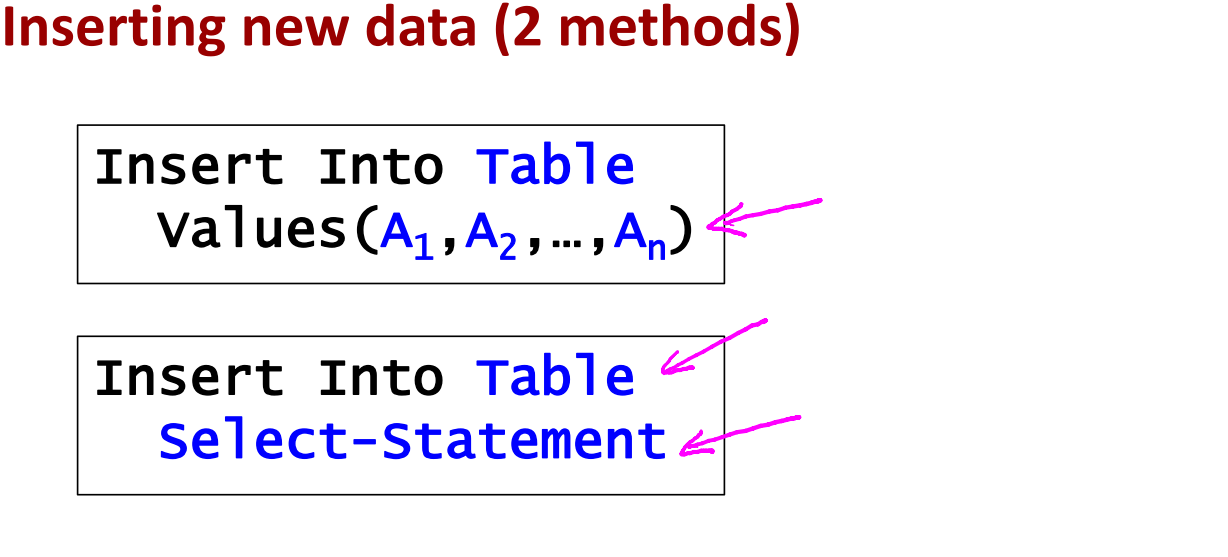

In [330]:
Image(filename="files/insert.png")

## DELETE

General form: delete from table
where a certain condition is true. So this condition is similar to
the conditions that we see in the select statement.
And every tuple in the
table that satisfies this condition will be deleted. 

Now this condition can be fairly complicated.
It can include sub-queries.
It can include aggregation over other
tables and so on.

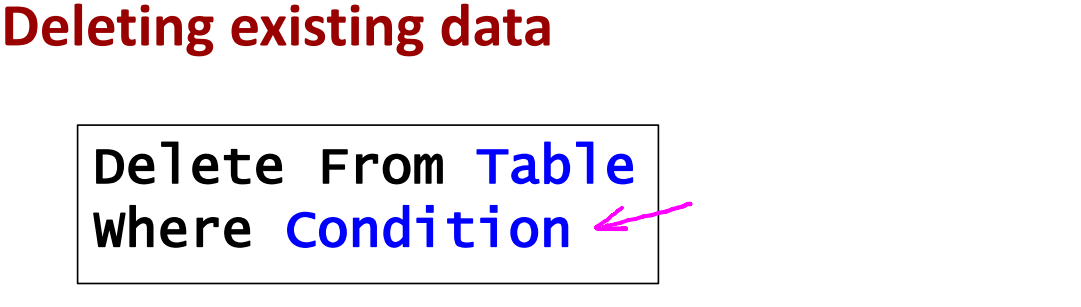

In [331]:
Image(filename="files/delete.png")

## UPDATE

Command similary to the DELETE command: It similarly operates on one table.
It evaluates a condition over each tuple of the table.
And now when the condition is true, we don't delete the tuple.
Instead, we modify the tuple. This query can also be quite complicated.

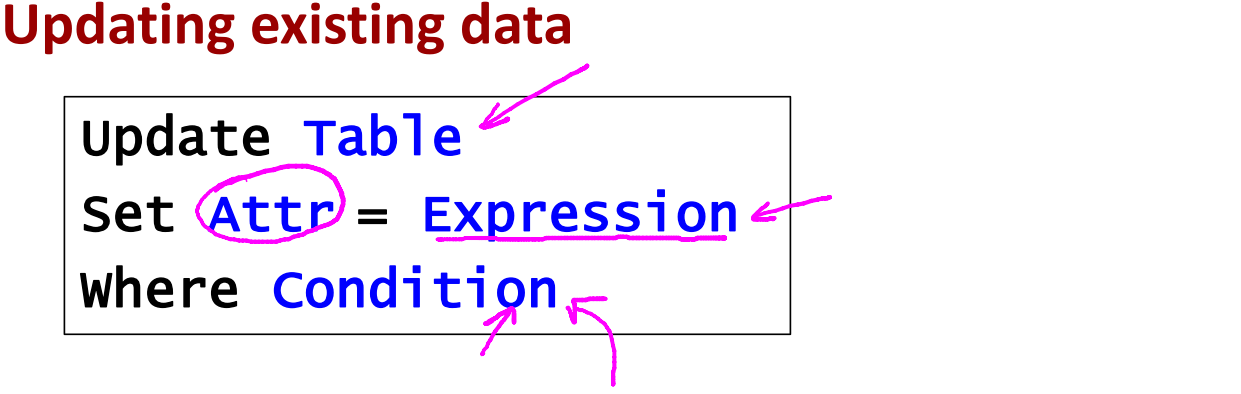

In [332]:
Image(filename="files/update.png")

We can also update
multiple attributes in a tuple.
So if we're updating a
table, again, exactly the same, a single table.
A condition identifies the
tuples to update, but now
we can update simultaneously any number
of attributes, each by evaluating
an expression and assigning the
result of that expression to the attribute.

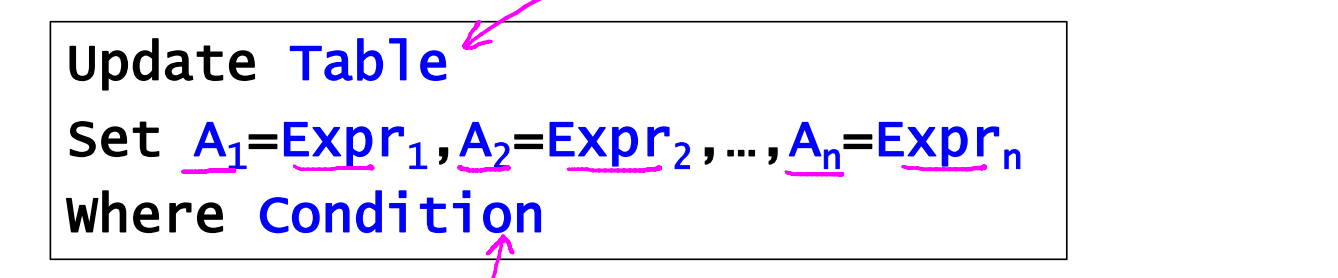

In [333]:
Image(filename="files/update2.png")

## Insert new college

In [334]:
%%sql 
insert into College values ('Carnegie Mellon', 'PA', 11500);
select * from College;

1 rows affected.
Done.


cName,state,enrollment
Stanford,CA,15000
Berkeley,CA,36000
MIT,MA,10000
Cornell,NY,21000
Carnegie Mellon,PA,11500


## Have all students who didn't apply anywhere apply to CS at Carnegie Mellon

Alteration: have
those students who haven't
applied anywhere yet, apply to
Carnegie Mellon, to be a computer science major.

Query: First see who will be inserted:

In [335]:
%%sql
select *
from Student
where sID not in (select sID from Apply);

Done.


sID,sName,GPA,sizeHS
456,Doris,3.9,1000
567,Edward,2.9,2000
789,Gary,3.4,800
654,Amy,3.9,1000
432,Kevin,None,1500


Then insert them:

In [340]:
%%sql
insert into Apply
  select sID, 'Carnegie Mellon', 'CS', null
  from Student
  where sID not in (select sID from Apply);

5 rows affected.


[]

## Admit to Carnegie Mellon EE all students who were turned down in EE elsewhere

First see who will be inserted:

In [342]:
%%sql
select *
from Student
where sID in (select sID from Apply
              where major = 'EE' and decision = 'N');

Done.


sID,sName,GPA,sizeHS
123,Amy,3.9,1000
345,Craig,3.5,500


Then insert them:

In [336]:
%%sql
insert into Apply
  select sID, 'Carnegie Mellon', 'EE', 'Y'
  from Student
  where sID in (select sID from Apply
                where major = 'EE' and decision = 'N');

2 rows affected.


[]

Check Apply table, to see the 7 inserted values (at the bottom):

In [341]:
%sql select * from Apply;

Done.


sID,cName,major,decision
123,Stanford,CS,Y
123,Stanford,EE,N
123,Berkeley,CS,Y
123,Cornell,EE,Y
234,Berkeley,biology,N
345,MIT,bioengineering,Y
345,Cornell,bioengineering,N
345,Cornell,CS,Y
345,Cornell,EE,N
678,Stanford,history,Y


## Delete all students who applied to more than two different majors

What we're going to do in this
example is we're going to
find all students that have
applied to more than two different
majors, and we're going
to decide that they are unreliable
students and we are going to entirely delete them from the database.

Query: First see who will be deleted.

In [344]:
%%sql
select sID, count(distinct major)
from Apply
group by sID
having count(distinct major) > 2;

Done.


sID,count(distinct major)
345,3
876,3


Then delete them:

In [345]:
%%sql
delete from Student
where sID in
  (select sID
   from Apply
   group by sID
   having count(distinct major) > 2);

2 rows affected.


[]

Delete same ones from Apply
Note: some systems disallow this.

In [346]:
%%sql
delete from Apply
where sID in
  (select sID
   from Apply
   group by sID
   having count(distinct major) > 2);

8 rows affected.


[]

Check out Apply after deleting the two students' applications:

In [347]:
%sql select * from Apply;

Done.


sID,cName,major,decision
123,Stanford,CS,Y
123,Stanford,EE,N
123,Berkeley,CS,Y
123,Cornell,EE,Y
234,Berkeley,biology,N
678,Stanford,history,Y
987,Stanford,CS,Y
987,Berkeley,CS,Y
765,Stanford,history,Y
765,Cornell,history,N


## Delete colleges with no CS applicants

Query: any college that doesn't
have a CS applicant is
probably not worth keeping in the database and we'll delete it.

First see who will be deleted:

In [351]:
%%sql
select * from College
where cName not in (select cName from Apply where major = 'CS');

Done.


cName,state,enrollment
Cornell,NY,21000


Then delete them

In [352]:
%%sql
delete from College
where cName not in (select cName from Apply where major = 'CS');

1 rows affected.


[]

View updated College table:

In [353]:
%sql select * from College

Done.


cName,state,enrollment
Stanford,CA,15000
Berkeley,CA,36000
MIT,MA,10000
Carnegie Mellon,PA,11500


## Accept applicants to Carnegie Mellon with GPA < 3.6 but turn them into economics majors (UPDATE)

First see who will be updated:

In [348]:
%%sql
select * from Apply
where cName = 'Carnegie Mellon'
  and sID in (select sID from Student where GPA < 3.6);

Done.


sID,cName,major,decision
567,Carnegie Mellon,CS,None
789,Carnegie Mellon,CS,None


Then UPDATE them.

In [349]:
%%sql
update Apply
set decision = 'Y', major = 'economics'
where cName = 'Carnegie Mellon'
  and sID in (select sID from Student where GPA < 3.6);

2 rows affected.


[]

Check out updated Apply table:

In [350]:
%sql select * from Apply;

Done.


sID,cName,major,decision
123,Stanford,CS,Y
123,Stanford,EE,N
123,Berkeley,CS,Y
123,Cornell,EE,Y
234,Berkeley,biology,N
678,Stanford,history,Y
987,Stanford,CS,Y
987,Berkeley,CS,Y
765,Stanford,history,Y
765,Cornell,history,N


## Turn the highest-GPA EE applicant into a CSE applicant

Here's a more complicated and highly motivated update command.

Query: find the student who has
the highest GPA and has
applied to major in EE
and we're going to change
them from an EE major to
a CSE major, a computer
science and engineering, rather than
just having them waste their time on electrical engineering.

This query
is an excellent review from previous
videos because it has
triply nested sub-queries.

Explanation of query: So in the innermost we
find the students who have
applied to EE, their student
ID's, then moving out
one level, we find the
GPA's of all the students
who have applied to major in EE.
Now we find all students
whose GPA is at least
as high as the highest EE
major, EE applicant, and
finally we find all students
who have applied to EE and have that highest GPA.

Let's run the query and see who gets affected:

(Doesn't work, as SQLite does not support `all`)

In [354]:
%%sql
select * from Apply
where major = 'EE'
  and sID in
    (select sID from Student
     where GPA >= all
        (select GPA from Student
         where sID in (select sID from Apply where major = 'EE')));

(sqlite3.OperationalError) near "all": syntax error [SQL: u"select * from Apply\nwhere major = 'EE'\n  and sID in\n    (select sID from Student\n     where GPA >= all\n        (select GPA from Student\n         where sID in (select sID from Apply where major = 'EE')));"]


Then update them

In [355]:
%%sql
update Apply
set major = 'CSE'
where major = 'EE'
  and sID in
    (select sID from Student
     where GPA >= all
        (select GPA from Student
         where sID in (select sID from Apply where major = 'EE')));

(sqlite3.OperationalError) near "all": syntax error [SQL: u"update Apply\nset major = 'CSE'\nwhere major = 'EE'\n  and sID in\n    (select sID from Student\n     where GPA >= all\n        (select GPA from Student\n         where sID in (select sID from Apply where major = 'EE')));"]


## Give everyone the highest GPA and smallest HS

In [356]:
%%sql
update Student
set GPA = (select max(GPA) from Student),
    sizeHS = (select min(sizeHS) from Student);

12 rows affected.


[]

In [357]:
%sql select * from Student

Done.


sID,sName,GPA,sizeHS
123,Amy,3.9,200
234,Bob,3.9,200
456,Doris,3.9,200
567,Edward,3.9,200
678,Fay,3.9,200
789,Gary,3.9,200
987,Helen,3.9,200
765,Jay,3.9,200
654,Amy,3.9,200
543,Craig,3.9,200


## Accept everyone

In [359]:
%%sql
update Apply
set decision = 'Y';

20 rows affected.


[]

In [360]:
%sql select * from Apply;

Done.


sID,cName,major,decision
123,Stanford,CS,Y
123,Stanford,EE,Y
123,Berkeley,CS,Y
123,Cornell,EE,Y
234,Berkeley,biology,Y
678,Stanford,history,Y
987,Stanford,CS,Y
987,Berkeley,CS,Y
765,Stanford,history,Y
765,Cornell,history,Y
